In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

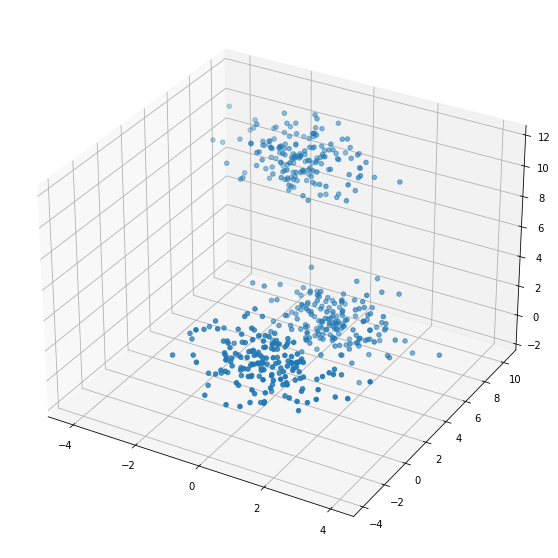

In [2]:
from sklearn.datasets import make_blobs

data=make_blobs(n_samples=500,n_features=3,centers=3,random_state=0)
df=data[0]
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(projection='3d')
ax.scatter(df[:,0],df[:,1],df[:,2])

In [3]:
from sklearn.cluster import KMeans

cluster=KMeans(n_clusters=3,random_state=0)

cluster.fit(df)
y_pred=cluster.labels_

y_pred1=cluster.fit_predict(df)



In [4]:
centroids=cluster.cluster_centers_
centroids
inertia=cluster.inertia_
inertia

1420.219347464836

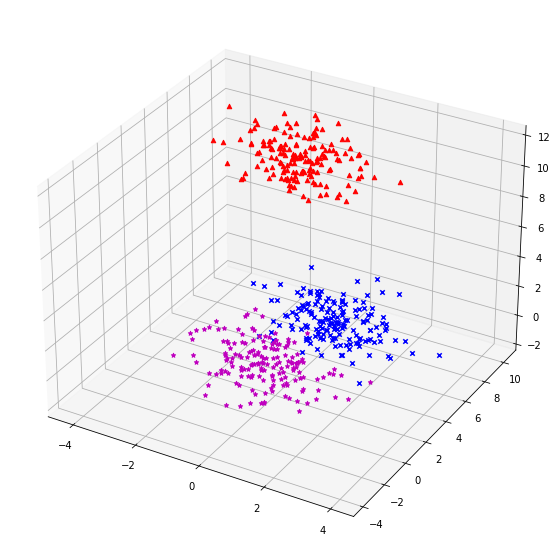

In [5]:
color_index=cluster.labels_.astype(int)
colors='rmbgk'
markers=['^','*','x']
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(projection='3d')
for i in range(len(df)):
    ax.scatter(df[i,0],df[i,1],df[i,2],c=colors[color_index[i]],marker=markers[color_index[i]])

In [6]:
from sklearn.metrics import silhouette_samples,silhouette_score,calinski_harabasz_score

silhouette_score(df,y_pred1)

0.6760072249313244

In [7]:
silhouette_samples(df,y_pred1).mean()

0.6760072249313244

In [8]:
calinski_harabasz_score(df,y_pred1)

2364.862492570163

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from matplotlib import cm


In [55]:
x,y=make_blobs(n_samples=500,n_features=3,centers=3,random_state=0)


n_clusters: 5.000000, silhouette_score: 0.362436


Text(0.5, 0, 'Feature space for the 2st feature')

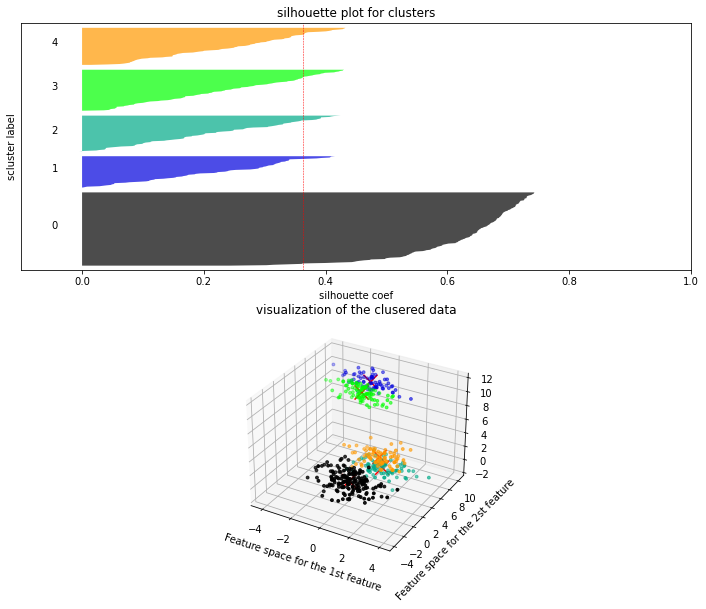

In [63]:
n_clusters=5

fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(211)
ax1.set_xlim([-0.1,1])
ax1.set_ylim([0,x.shape[0]+(n_clusters+1)*10])

cluster=KMeans(n_clusters=n_clusters,random_state=0)
y_pred=cluster.fit_predict(x)


silhouette_avg=silhouette_score(x,y_pred)
print('n_clusters: %f, silhouette_score: %f'%(n_clusters,silhouette_avg))
sample_silhouette_values=silhouette_samples(x,y_pred)

y_lower=10

for i in range(n_clusters):
    ith_cluster_silhouette_values=sample_silhouette_values[y_pred==i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    
    y_upper=y_lower+size_cluster_i
    
    color=cm.nipy_spectral(float(i)/n_clusters)
    ax1.fill_betweenx(np.arange(y_lower,y_upper),ith_cluster_silhouette_values,facecolor=color,alpha=0.7)
    
    ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
    
    y_lower=y_upper+10

ax1.set_title('silhouette plot for clusters')
ax1.set_xlabel('silhouette coef')
ax1.set_ylabel('scluster label')
ax1.axvline(x=silhouette_avg,c='r',ls='--',lw=0.5)
ax1.set_yticks([])

ax2=fig.add_subplot(212,projection='3d')
colors=cm.nipy_spectral(y_pred.astype(float)/n_clusters)
ax2.scatter(x[:,0],x[:,1],x[:,2],marker='o',s=8,c=colors)
centers=cluster.cluster_centers_
ax2.scatter(centers[:,0],centers[:,1],centers[:,2],marker='x',c='r',alpha=1,s=200)
ax2.set_title('visualization of the clusered data')
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2st feature')

In [60]:
x.shape

(500, 3)

In [33]:
sample_silhouette_values

array([ 0.68076292,  0.31697513,  0.52834296,  0.05265055,  0.65218792,
        0.35906875,  0.26758712,  0.53246713,  0.66662657,  0.59033815,
        0.71192962,  0.0714186 ,  0.41654614,  0.74202559,  0.28339863,
        0.11195655,  0.61621975,  0.70608073,  0.24057418,  0.0388544 ,
        0.06405987,  0.07373742,  0.05683855,  0.58756213,  0.22985761,
        0.63664214,  0.22302251,  0.28439657,  0.39618378,  0.09803094,
        0.32635535,  0.64914535,  0.54557916,  0.56552544,  0.13385588,
        0.28348219,  0.34678231,  0.3059823 ,  0.06191176,  0.03802949,
        0.08656635,  0.28104651,  0.11372527,  0.08751455,  0.05233454,
        0.30280587,  0.40052084,  0.27617702,  0.23474006,  0.50600127,
        0.37749295,  0.71246808,  0.09231654,  0.32719639,  0.34369434,
        0.36239142,  0.67448879,  0.68172712,  0.65079864,  0.16765801,
        0.14858029,  0.14632642,  0.22869052,  0.18281693,  0.11965638,
        0.05392334,  0.73082682,  0.37119569,  0.15221677,  0.53

In [18]:
x.shape

(500, 3)

silhouette_score: 0.53, inertia: 65163.31
silhouette_score: 0.62, inertia: 28384.69
silhouette_score: 0.69, inertia: 10405.39
silhouette_score: 0.75, inertia: 3837.99
silhouette_score: 0.63, inertia: 3668.23


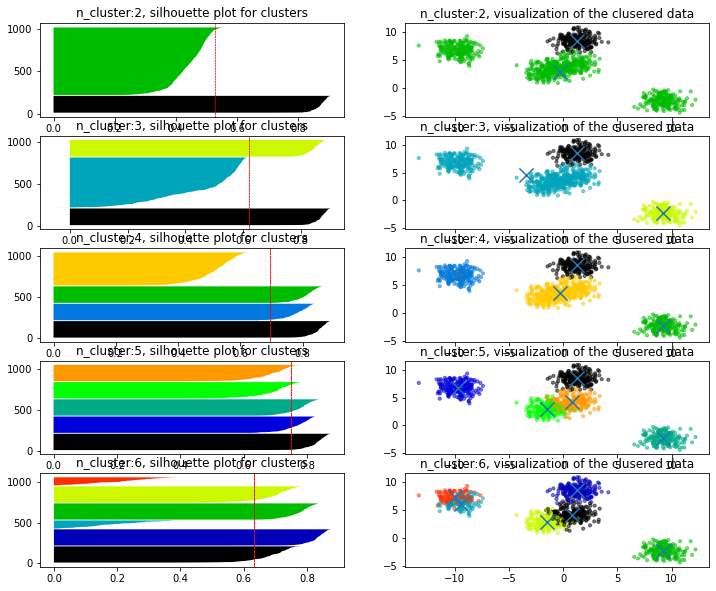

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

data = make_blobs(n_samples=1000, n_features=4, centers=5, random_state=0)

n_cluster = 5

x, y = data

n_clusters = 6
fig, ax = plt.subplots(n_clusters - 1, 2, figsize=(12, 10))

for index, n_cluster in enumerate(range(2, n_clusters + 1)):

    cluster = KMeans(n_clusters=n_cluster, random_state=0)
    y_pred = cluster.fit_predict(x)
    s_score = silhouette_score(x, y_pred)
    i_score = cluster.inertia_
    s_values = silhouette_samples(x, y_pred)
    s_values_dict = {i: sorted(s_values[y_pred == i]) for i in range(n_cluster)}
    print('silhouette_score: %0.2f, inertia: %0.2f' % (s_score, i_score))
    y_low = 10
    for i in s_values_dict:
        y_high = y_low + len(s_values_dict[i])
        color = cm.nipy_spectral(int(i) / n_cluster)

        ax[index][0].fill_betweenx(np.arange(y_low, y_high), s_values_dict[i], facecolor=color)
        y_low = y_high + 10
        ax[index][0].axvline(x=s_score, c='r', ls='--', lw=0.5)

    color1 = cm.nipy_spectral(y_pred.astype(int) / n_cluster)
    ax[index][1].scatter(x[:, 0], x[:, 1], c=color1, s=10, alpha=0.5)
    ax[index][1].scatter(cluster.cluster_centers_[:, 0], cluster.cluster_centers_[:, 1], marker='x', s=200)

    ax[index][0].set_title('n_cluster:%d, silhouette plot for clusters' % (n_cluster))
    ax[index][1].set_title('n_cluster:%d, visualization of the clusered data' % (n_cluster))

plt.show()


        
    

## 矢量量化

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [5]:
china=load_sample_image('china.jpg')

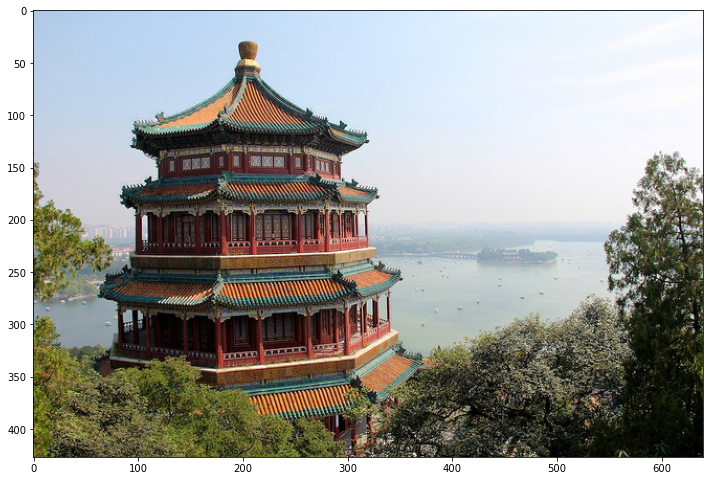

In [32]:
plt.figure(figsize=(12,10))
plt.imshow(china)

In [12]:
china.shape

(427, 640, 3)

In [31]:
new_data=pd.DataFrame(china.reshape(427*640,3))
print(new_data.shape)
new_data.drop_duplicates()

(273280, 3)


,0,1,2
0,174,201,231
8,173,202,232
9,172,201,231
15,174,203,233
16,175,204,234
...,...,...,...
273204,28,51,23
273207,101,111,77
273208,69,82,64
273209,46,50,36


In [43]:
n_clusters=64

from sklearn.preprocessing import MinMaxScaler

new_china=np.array(china,dtype=np.float64)/china.max()
new_china

new_china1=MinMaxScaler().fit_transform(china.reshape(427*640,3))
new_china1=new_china1.reshape(427,640,3)
new_china1

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ],
        [0.98039216, 0.98431373, 1.        ]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        ...,
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ],
        [0.98431373, 0.98823529, 1.        ]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        ...,
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ]],

       ...,

       [[0.34509804, 0.31372549, 0.02745098],
        [0.57647059, 0.54117647, 0.27058824],
        [0.47843137, 0

In [46]:
(new_china1>1).any() | (new_china1<0).any()

False

In [91]:
from sklearn.cluster import KMeans

w,h,d=china.shape
print(w,h,d)
assert d==3, '一个格子中的特征数不为3'
image_array=new_china1.reshape(w*h,d).astype(np.float64)
image_array.shape


n_clusters=64

image_array_sample=shuffle(image_array,random_state=0)[:2000]
cluster=KMeans(n_clusters=n_clusters,random_state=0)
y_pred=cluster.fit_predict(image_array)
centers=cluster.cluster_centers_


image_kmeans=image_array.copy()
for i in range(len(image_kmeans)):
    image_kmeans[i]=centers[y_pred[i]]



427 640 3


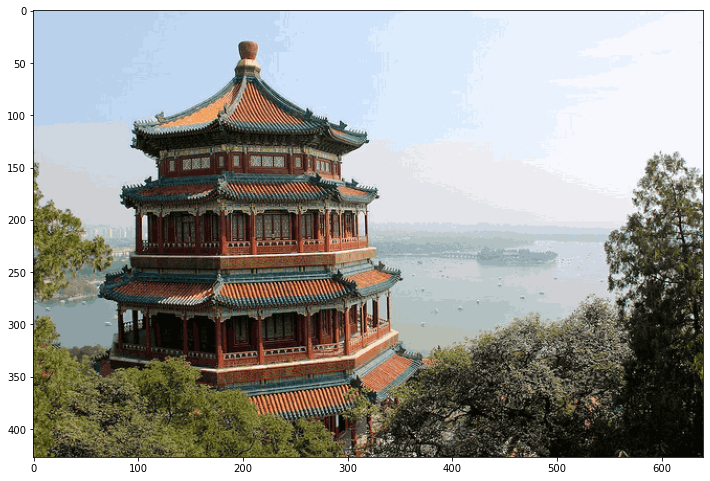

In [92]:
pd.DataFrame(image_kmeans).drop_duplicates().shape
image_kmeans1= image_kmeans.reshape(w,h,d)
plt.figure(figsize=(12,10))
plt.imshow(image_kmeans1)

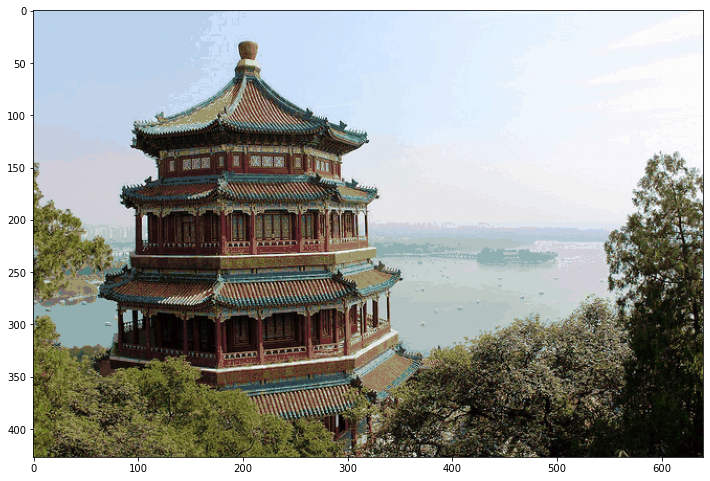

In [104]:
centers_random=shuffle(image_array,random_state=0)[:n_clusters]
label_random=pairwise_distances_argmin(centers_random,image_array,axis=0)
image_array3=centers_random[label_random].reshape(w,h,d)
plt.figure(figsize=(12,10))
plt.imshow(image_array3)